Import necessary libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next step is to load and name the dataset for cleaning and exploration

In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\2017_Yellow_Taxi_Trip_Data.csv.csv')

In [5]:
# Rename the DataFrame properly
taxi_data = df

# Now, let's start inspecting the dataset
taxi_data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [6]:
# Let's see the shape of the dataset
taxi_data.shape

# This dataset has 22,699 rows and 18 columns

(22699, 18)

In [7]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
taxi_data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
# From previous results, we can see that pickup and dropoff datatimes were saved as objects instead of data
# The following codes, changes the datatype to datetime.

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

In [10]:
# Now, we inspect the updated dataset.

taxi_data.info()
print()
print()
print(taxi_data)
print()
print()
taxi_data.head()
print()
print()
taxi_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295


In [11]:
# Check for null values
taxi_data.isnull().sum()

# This dataset does not have any null values.

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [12]:
zero_to_negative_fare = taxi_data[taxi_data['fare_amount'] < 1]

In [13]:
zero_to_negative_fare.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.12,1,N,161,161,3,-2.50,-0.5,-0.5,0.0,0.0,-0.3,-3.80
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,3,-2.50,0.0,-0.5,0.0,0.0,-0.3,-3.30
4061,68377591,1,2017-08-12 20:49:29,2017-08-12 21:18:50,4,4.50,5,N,107,265,3,0.01,0.0,0.0,0.0,10.5,0.3,10.81
4402,108016954,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.06,1,N,263,169,2,0.00,0.0,0.0,0.0,0.0,0.0,0.00
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,4,-3.00,-0.5,-0.5,0.0,0.0,-0.3,-4.30
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,3,-3.50,0.0,-0.5,0.0,0.0,-0.3,-4.30
5722,49670364,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.00,1,N,264,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.00
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,3,-2.50,-0.5,-0.5,0.0,0.0,-0.3,-3.80
8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.41,1,N,236,237,3,-3.50,-0.5,-0.5,0.0,0.0,-0.3,-4.80
10281,55302347,2,2017-06-05 17:34:25,2017-06-05 17:36:29,2,0.00,1,N,238,238,4,-2.50,-1.0,-0.5,0.0,0.0,-0.3,-4.30


The above code reveals that several rows contain negative fare or total amounts, as well as zero-distance trips. 
These likely represent data entry errors or invalid transactions.

The next best step is to ask questions to know if these are valid entries to ensure we are not removing rows of data based on assumption.
Because these is a project and there is no real client to ask, in the next steps, I will flag anomalies and remove them and assign the data to a new name. For example, current DataFrame is assigned to taxi_data, I will save the cleaned table to taxi_clean.

In [15]:
# Flag Anomalies

taxi_data['is_anomaly'] = (
    (taxi_data['fare_amount'] < 0) |
    (taxi_data['total_amount'] < 0) |
    (taxi_data['trip_distance'] < 0.05)
)

In [16]:
taxi_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,is_anomaly
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,False
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,False
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,False
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,False
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,False
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,False
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,False
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,False


In [17]:
# Remove anomalies and save the clean dataset with a new name to retain but new and old.

taxi_clean = taxi_data[~taxi_data['is_anomaly']]
taxi_clean

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,is_anomaly
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,False
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,False
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,False
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,False
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,False
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,False
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,False
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,False


We will now use taxi_clean and not taxi_data but taxi_data still exists and can be used in light of new information not currently possesed.

We also noticed that some entries had total_amount of less than 3.5, while these are not necessarily a problem they are worth looking into.

In light of the point above, let's investigate rides that had total_amount less than $3.5 but not less than $1. Remember we have already treated transactions below $1.

In [21]:
# Sort for data between $1 and $3.5
taxi_clean[(taxi_clean['total_amount'] >= 1) & (taxi_clean['total_amount'] < 3.6)].head(10)

# All we can see here are trips with the standard minimum fare amount of $3.3. Now let's look at trips with fares below that amount.

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,is_anomaly
3734,13612394,1,2017-02-20 16:58:03,2017-02-20 16:58:15,1,0.60,1,N,265,265,3,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
6700,71953966,1,2017-08-26 07:33:22,2017-08-26 07:34:18,1,0.10,1,N,231,231,3,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
11357,109314731,2,2017-12-25 10:28:28,2017-12-25 10:28:38,2,0.06,1,N,141,141,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
16341,66613595,1,2017-08-06 14:56:13,2017-08-06 14:56:32,1,0.10,1,N,230,100,3,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
17747,49938639,1,2017-06-13 14:45:20,2017-06-13 14:46:07,1,0.10,1,N,144,144,3,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
19776,109201567,2,2017-12-24 16:29:28,2017-12-24 16:30:23,1,0.07,1,N,262,263,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
20816,75036485,1,2017-09-07 10:11:51,2017-09-07 10:12:25,1,2.70,1,N,239,239,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
21151,69183921,2,2017-08-16 06:59:42,2017-08-16 07:00:34,2,0.14,1,N,163,43,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
22035,104619808,2,2017-12-10 12:20:19,2017-12-10 12:20:56,1,0.09,1,N,234,234,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False
22102,58997093,1,2017-07-11 14:42:04,2017-07-11 14:42:06,1,1.10,1,N,178,178,3,2.5,0.0,0.5,0.0,0.0,0.3,3.3,False


In [22]:
# Check for transactions below the minimum fair amount.
taxi_clean[taxi_clean['total_amount'] < 3.3]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,is_anomaly
4402,108016954,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.06,1,N,263,169,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
19067,58713019,1,2017-07-10 14:40:09,2017-07-10 14:40:59,1,0.10,5,N,261,13,3,0.0,0.0,0.0,0.0,0.0,0.3,0.3,False


The second transaction is not an anomaly since it's through payment 3 which is promotion and they were only charged improvement surcharge
which is normal.

The second transaction used cash payment method and trip distace of 7meters but made payment of $0 which is definitely an anomaly

In [ ]:
# Let's flag the suspicious transaction as an anomaly.
'''
Please note that before the following code was used to flag the single anomaly transaction, we had to remove the previous anomaly column which no
longer served any purpose and then re-created an anomaly column that flags this single transaction as anomaly.
'''
taxi_clean['is_anomaly'] = (
    (taxi_clean['trip_distance'] == 7.06) & (taxi_clean['total_amount'] == 0) & (taxi_clean['fare_amount'] == 0))

In [25]:
taxi_clean['is_anomaly'].value_counts()

is_anomaly
False    22513
True         1
Name: count, dtype: int64

In [26]:
taxi_clean

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,is_anomaly
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,False
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,False
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,False
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,False
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,False
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,False
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,False
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,False


Now that we have flagged and removed anomalies except one (which shouldn't be removed without asking stakeholder why it's as it is), we can go ahead and use .describe() and info() to see if there is any more data cleaning to do.

In [28]:
taxi_clean.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.251400e+04,22514.000000,22514,22514,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000
mean,5.675544e+07,1.556276,2017-06-29 08:25:03.886204160,2017-06-29 08:42:08.798880768,1.643999,2.937069,1.032158,162.340055,161.462645,1.332371,12.973843,0.333703,0.498601,1.831779,0.309638,0.299987,16.252876
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.050000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.857518e+07,1.000000,2017-03-30 07:21:40.750000128,2017-03-30 07:46:58.500000,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673320e+07,2.000000,2017-06-23 13:22:39,2017-06-23 13:39:14.500000,1.000000,1.630000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,8.536526e+07,2.000000,2017-10-02 09:52:36.249999872,2017-10-02 10:04:25.750000128,2.000000,3.100000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,3.273289e+07,0.496834,NaN,NaN,1.286721,3.658690,0.233620,66.583451,70.090991,0.490023,12.656270,0.461765,0.026413,2.764803,1.387330,0.001999,15.546971


In [29]:
taxi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22514 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22514 non-null  int64         
 1   VendorID               22514 non-null  int64         
 2   tpep_pickup_datetime   22514 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22514 non-null  datetime64[ns]
 4   passenger_count        22514 non-null  int64         
 5   trip_distance          22514 non-null  float64       
 6   RatecodeID             22514 non-null  int64         
 7   store_and_fwd_flag     22514 non-null  object        
 8   PULocationID           22514 non-null  int64         
 9   DOLocationID           22514 non-null  int64         
 10  payment_type           22514 non-null  int64         
 11  fare_amount            22514 non-null  float64       
 12  extra                  22514 non-null  float64       
 13  mta_ta

We've found a number of issued worth looking into
1. rides with 0 passenge which should be absolutely impossible
2. Rides with extremely high price like $999 fare_amount & $1200 total_amount and tips of $200 dollars when other rides doesn't come close
3. Extremely high trip distance like 33.96 miles
4. Columnn named Unknown. Just an index column from the CSV — doesn’t help the analysis.
5. store_and_fwd_flag. Not shown in .describe() (possibly because it’s object type). Should contain 'Y' or 'N' for machine learning model to understand.

3 is not necessarily an anomaly but it's worth looking into.

In [31]:
# 1. Rides with 0 passenger.
# The best course of action is to remove these transactions but note that the original dataframe is untouched incase any of these steps are wrong.

taxi_clean = taxi_clean[taxi_clean['passenger_count'] > 0]

In [32]:
# 2. Trip with $1200 total amount with just 2.6m trip distance
# Since there is no one to ask, I'll take this as an error and remove this transaction.

taxi_clean = taxi_clean[~(taxi_clean['total_amount'] == 1200.290)]

In [33]:
# 3. Extremely high trip distance of 33miles
# This is not necesarily an anomaly, we will flag this as anomaly but not remove but before we decide to keep it, let's investigate it further by 
# looking at the number of passenger, fare amount and total amount.

# Let's check the fare_amount and total_amount of the said transaction to confirm any suspicion
taxi_clean.sort_values(by='total_amount', ascending = False) # This helps us see trips in descending order of total_amount

#It reveals that the transaction is totally unsuspicious especially as it cost a total of 258 dollars which is roughly 7 dollars per mile.

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,is_anomaly
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,False
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,False
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06,False
3582,111653084,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30,False
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,71953966,1,2017-08-26 07:33:22,2017-08-26 07:34:18,1,0.10,1,N,231,231,3,2.50,0.0,0.5,0.00,0.00,0.3,3.30,False
22680,39375701,1,2017-05-16 06:35:44,2017-05-16 06:35:51,1,1.30,1,N,230,230,3,2.50,0.0,0.5,0.00,0.00,0.3,3.30,False
22035,104619808,2,2017-12-10 12:20:19,2017-12-10 12:20:56,1,0.09,1,N,234,234,2,2.50,0.0,0.5,0.00,0.00,0.3,3.30,False
19067,58713019,1,2017-07-10 14:40:09,2017-07-10 14:40:59,1,0.10,5,N,261,13,3,0.00,0.0,0.0,0.00,0.00,0.3,0.30,False


After inspecting the above table, we see another trip worth flagging, it has a total trip distance of 7 miles but cost 152 dollars. that's way out of line.

The trip is definitely an outlier and will be removed.

In [35]:
taxi_clean = taxi_clean[~((taxi_clean['trip_distance'] == 7.30) &
                        (taxi_clean['total_amount'] == 152.30))]      # removes the outlier

In [36]:
taxi_clean.sort_values(by='total_amount', ascending = False) # Checks the sorted data for the outlier. It's been removed.

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,is_anomaly
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,False
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,False
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06,False
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30,False
1928,51087145,1,2017-06-16 18:30:08,2017-06-16 19:18:50,2,12.50,5,N,211,265,1,120.00,0.0,0.0,5.00,12.50,0.3,137.80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19776,109201567,2,2017-12-24 16:29:28,2017-12-24 16:30:23,1,0.07,1,N,262,263,2,2.50,0.0,0.5,0.00,0.00,0.3,3.30,False
21151,69183921,2,2017-08-16 06:59:42,2017-08-16 07:00:34,2,0.14,1,N,163,43,2,2.50,0.0,0.5,0.00,0.00,0.3,3.30,False
22680,39375701,1,2017-05-16 06:35:44,2017-05-16 06:35:51,1,1.30,1,N,230,230,3,2.50,0.0,0.5,0.00,0.00,0.3,3.30,False
19067,58713019,1,2017-07-10 14:40:09,2017-07-10 14:40:59,1,0.10,5,N,261,13,3,0.00,0.0,0.0,0.00,0.00,0.3,0.30,False


Now, we remove the index column that is not useful for this analysis.

In [38]:
taxi_clean.drop(columns=['Unnamed: 0'], inplace=True) # removes the column.
taxi_clean.describe() # Checks if it's been removed.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22480.000000,22480,22480,22480.000000,22480.000000,22480.000000,22480.000000,22480.00000,22480.000000,22480.000000,22480.000000,22480.000000,22480.000000,22480.000000,22480.000000,22480.000000
mean,1.557117,2017-06-29 03:58:01.045818624,2017-06-29 04:15:06.275000064,1.646397,2.937356,1.031851,162.356673,161.45992,1.332607,12.924872,0.333941,0.498643,1.822518,0.309594,0.299987,16.194887
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.050000,1.000000,4.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2017-03-30 02:10:48.500000,2017-03-30 02:21:30.249999872,1.000000,1.000000,1.000000,114.000000,112.00000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,2017-06-23 09:28:11,2017-06-23 09:37:36.500000,1.000000,1.630000,1.000000,162.000000,162.00000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,2.000000,2017-10-01 17:47:49.750000128,2017-10-01 17:55:03.249999872,2.000000,3.100000,1.000000,233.000000,233.00000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,265.000000,265.00000,4.000000,200.010000,4.500000,0.500000,55.500000,19.100000,0.300000,258.210000
std,0.496738,NaN,NaN,1.286182,3.660202,0.230778,66.575650,70.07471,0.490131,10.777177,0.461908,0.026011,2.429686,1.387377,0.002001,13.369379


In [39]:
taxi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22480 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22480 non-null  int64         
 1   tpep_pickup_datetime   22480 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22480 non-null  datetime64[ns]
 3   passenger_count        22480 non-null  int64         
 4   trip_distance          22480 non-null  float64       
 5   RatecodeID             22480 non-null  int64         
 6   store_and_fwd_flag     22480 non-null  object        
 7   PULocationID           22480 non-null  int64         
 8   DOLocationID           22480 non-null  int64         
 9   payment_type           22480 non-null  int64         
 10  fare_amount            22480 non-null  float64       
 11  extra                  22480 non-null  float64       
 12  mta_tax                22480 non-null  float64       
 13  tip_am

In [40]:
taxi_clean['store_and_fwd_flag_binary'] = taxi_clean['store_and_fwd_flag'].map({'N': 0, 'Y': 1}) # creates a binary store and fwd flag
taxi_clean

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,is_anomaly,store_and_fwd_flag_binary
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,False,0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,False,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,False,0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,False,0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,False,0
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,False,0
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,False,0
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,False,0


In [41]:
taxi_clean['payment_type'].value_counts()
taxi_clean['RatecodeID'].value_counts()

RatecodeID
1    21912
2      492
3       36
5       32
4        8
Name: count, dtype: int64

In [42]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


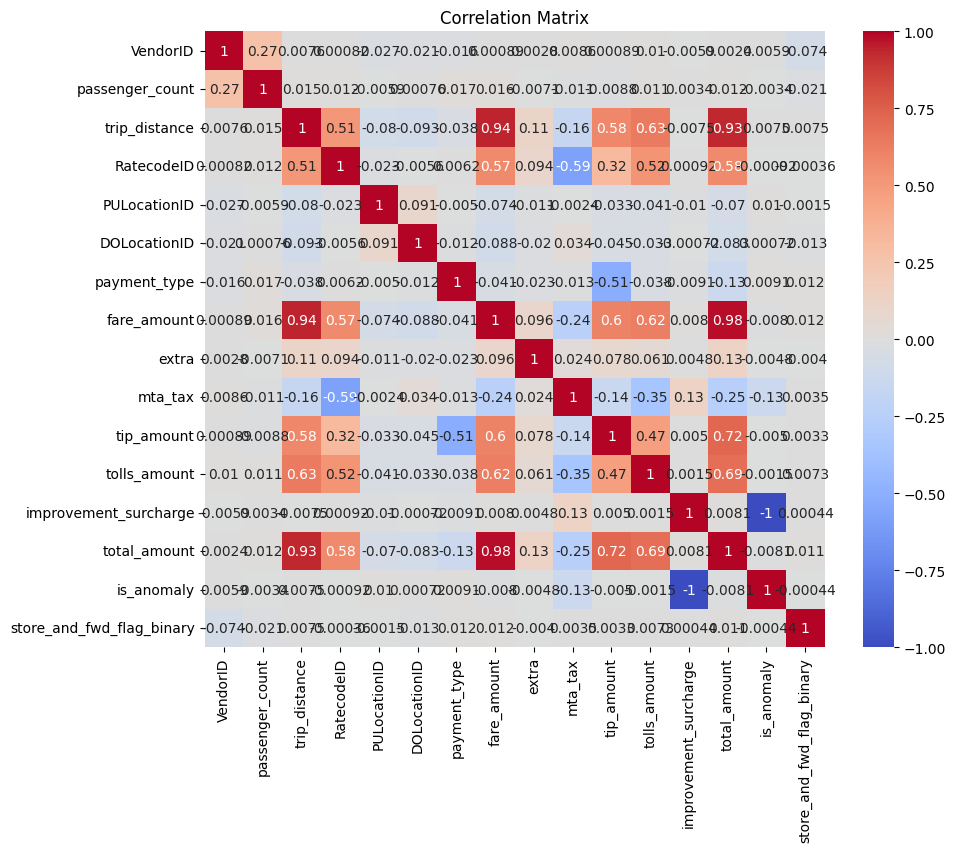

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(taxi_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

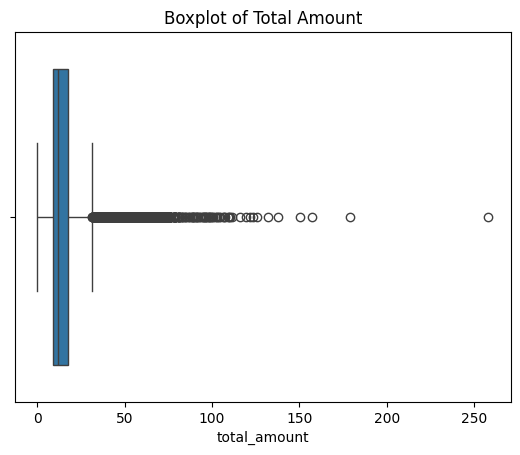

In [90]:
sns.boxplot(x=taxi_clean['total_amount'])
plt.title('Boxplot of Total Amount')
plt.show()

In [93]:
taxi_clean.to_csv(r'C:\Users\DELL\Desktop\Taxi_data_cleaned\cleaned_taxi_data.csv', index=False)

In [95]:
import os
os.getcwd()

'C:\\Users\\DELL'